In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df = pd.DataFrame(index=range(30, 86))
df.index.name = 'vdot'

# 1,500
t = [8,30,8,15,8,2,7,49,7,37,7,25,7,14,7,4,6,54,6,44,6,35,6,27,6,19,6,11,6,3,
     5,56,5,49,5,42,5,36,5,30,5,24,5,18,5,13,5,7,5,2,4,57,4,53,4,48,4,44,4,39,
     4,35,4,31,4,27,4,24,4,20,4,16,4,13,4,10,4,6,4,3,4,0,3,57,3,54,3,52,3,49,
     3,46,3,44,3,41,3,39,3,37,3,34,3,32,3,30,3,28,3,26,3,24]
df['1.5k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# Mile
# t = []
# df[''] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# 3k
# t = []
# df[''] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# 2 mile
# t = []
# df[''] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# 5k
# t = []
# df[''] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# 10k
t = [63,46,62,3,60,26,58,54,57,26,56,3,54,44,53,29,52,17,51,9,50,3,49,1,48,1,
     47,4,46,9,45,16,44,25,43,36,42,50,42,4,41,21,40,39,39,59,39,20,38,42,38,6,
     37,31,36,57,36,24,35,52,35,22,34,52,34,23,33,55,33,28,33,1,32,35,32,11,
     31,46,31,23,31,0,30,38,30,16,29,55,29,34,29,14,28,55,28,36,28,17,27,59,27,
     41,27,24,27,7,26,51,26,34,26,19]
df['10k'] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# 15k
# t = []
# df[''] = [datetime.timedelta(minutes=m, seconds=s) for m, s in zip(t[0::2], t[1::2])]

# half marathon
t = [2,21,4,2,17,21,2,13,49,2,10,27,2,7,16,2,4,13,2,1,19,1,58,34,1,55,55,
     1,53,24,1,50,59,1,48,40,1,46,27,1,44,20,1,42,17,1,40,20,1,38,27,1,36,38,
     1,34,53,1,33,12,1,31,35,1,30,2,1,28,31,1,27,4,1,25,40,1,24,18,1,23,0,
     1,21,43,1,20,30,1,19,18,1,18,9,1,17,2,1,15,57,1,14,54,1,13,53,1,12,53,
     1,11,56,1,11,0,1,10,5,1,9,12,1,8,21,1,7,31,1,6,42,1,5,54,1,5,8,1,4,23,
     1,3,39,1,2,56,1,2,15,1,1,34,1,0,54,1,0,15,0,59,38,0,59,1,0,58,25,0,57,50]
df['half marathon'] = [datetime.timedelta(hours=h, minutes=m, seconds=s) for h, m, s in zip(t[0::3], t[1::3], t[2::3])]

# marathon
t = [4,49,17,4,41,57,4,34,59,4,28,22,4,22,3,4,16,3,4,10,19,4,4,50,3,59,35,
     3,54,34,3,49,45,3,45,9,3,40,43,3,36,28,3,32,23,3,28,26,3,24,39,3,21,0,
     3,17,29,3,14,6,3,10,49,3,7,39,3,4,36,3,1,39,2,58,47,2,56,1,2,53,20,2,50,45,
     2,48,14,2,45,47,2,43,25,2,41,8,2,38,54,2,36,44,2,34,38,2,32,35,2,30,36,
     2,28,40,2,26,47,2,24,57,2,23,10,2,21,26,2,19,44,2,18,5,2,16,29,2,14,55,
     2,13,23,2,11,54,2,10,27,2,9,2,2,7,38,2,6,17,2,4,57,2,3,40,2,2,24,2,1,10]
df['marathon'] = [datetime.timedelta(hours=h, minutes=m, seconds=s) for h, m, s in zip(t[0::3], t[1::3], t[2::3])]

In [22]:
X = pd.DataFrame(data=df.index)
X['vdot_log'] = np.log(X.vdot)
X['vdot_reciprocal'] = 1/X.vdot
X['vdot_pow2'] = X.vdot ** 2
X['vdot_pow3'] = X.vdot ** 3

Text(0.5, 1.0, 'x5 vdot_pow3')

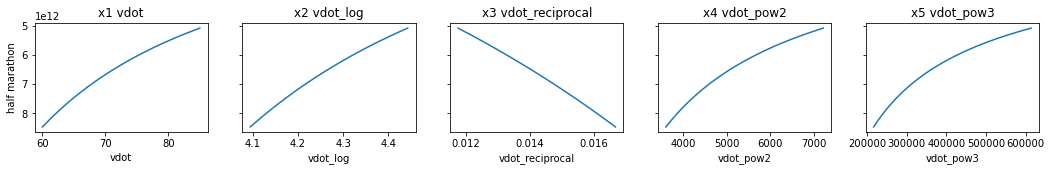

In [23]:
target = 'half marathon'

fig, ax = plt.subplots(1, 5, figsize=(18, 2), sharey=True)
sns.lineplot(x=X.vdot, y=df[target], ax=ax[0]).set_title('x1 vdot')
sns.lineplot(x=X.vdot_log, y=df[target], ax=ax[1]).set_title('x2 vdot_log')
sns.lineplot(x=X.vdot_reciprocal, y=df[target], ax=ax[2]).set_title('x3 vdot_reciprocal')
sns.lineplot(x=X.vdot_pow2, y=df[target], ax=ax[3]).set_title('x4 vdot_pow2')
sns.lineplot(x=X.vdot_pow3, y=df[target], ax=ax[4]).set_title('x5 vdot_pow3')

In [24]:
from sklearn.linear_model import LinearRegression

y = df['half marathon'].apply(lambda x: int(x.total_seconds()))

clf = LinearRegression()
clf.fit(X, y)

print(clf.score(X, y))
print(np.round((clf.predict(X)), 0) - y.values)
print(f"np.array([{clf.intercept_}, {clf.coef_[0]}, {clf.coef_[1]}, {clf.coef_[2]}, {clf.coef_[3]}, {clf.coef_[4]}])")

0.9999999603681187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]
np.array([36453.132974194465, 190.89491161314612, -10044.062274881275, 35179.734779269216, -0.8700911886656826, 0.0020931669969286304])


### weights and methods

In [29]:
metadata = {
    'e_pace': {
        'distance': 1.0,
        'weights': None,
    },
    't_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'i_pace': {
        'distance': 1.0,
        'weights': None,
    },
    'r_pace': {
        'distance': 1.0,
        'weights': None,
    },
    '1.5k': {
        'distance': 1.5,
        'weights': np.array([1182.085091699069, 6.367170440963579, -322.778681874542,
                             7865.746434686376, -0.03397766949704373, 0.00011018322157951843]),
    },
    '1 mile': {
        'distance': 1.60934,
        'weights': None,
    },
    '3k': {
        'distance': 3.0,
        'weights': None,
    },
    '2 mile': {
        'distance': 3.21869,
        'weights': None,
    },
    '5k': {
        'distance': 5.0,
        'weights': None,
    },
    '10k': {
        'distance': 10.0,
        'weights': np.array([11045.008738808692, 48.69849842830903, -2919.2894591605072,
                             42237.01880476229, -0.18713464363791843, 0.0003564040634955745]),
    },
    'half marathon': {
        'distance': 21.0975,
        'weights': np.array([36453.132974194465, 190.89491161314612, -10044.062274881275,
                             35179.734779269216, -0.8700911886656826, 0.0020931669969286304])
    },
    'marathon': {
        'distance': 42.195,
        'weights': np.array([60636.22986513261, 246.74130046555726, -15730.318846607715,
                             109197.36142110199, -0.9739181072484939, 0.002111978999892017]),
    }
}

def get_time(vdot, race):
    X = np.array([1, vdot, np.log(vdot), 1/vdot, vdot**2, vdot**3])
    w = metadata[race]['weights']
    seconds = np.round(X @ w,)
    return datetime.timedelta(seconds=seconds)

def calculate_pace(time: datetime.timedelta, distance: float) -> datetime.timedelta:
    return time / distance

def calculate_time(distance: float, pace: datetime.timedelta) -> datetime.timedelta:
    return distance * pace

def calculate_distance(time: datetime.timedelta, pace: datetime.timedelta) -> float:
    return np.round(time / pace, 5)

def convert_pace_km_to_miles(pace: datetime.timedelta) -> datetime.timedelta:
    return pace / 0.621371

def convert_pace_miles_to_km(pace: datetime.timedelta) -> datetime.timedelta:
    return pace * 0.621371

def format_time(td: datetime.timedelta, strip: bool=True):
    td = datetime.timedelta(seconds=td.seconds).__str__()
    return re.search(pattern=r'[1-9].*', string=td).group() if strip else td

### Test output

In [30]:
vdot = 57
race = ['1.5k', '10k', 'marathon'][2]
distance = metadata[race]['distance']
time = get_time(vdot, race)
print(f'vdot: {vdot} \nrace: {race} \ndistance: {distance} \ntime: {format_time(time)}')

pace = calculate_pace(time, distance)
pace_mi = convert_pace_km_to_miles(pace)
time = calculate_time(distance, pace)
distance = calculate_distance(time, pace)
print(f'\npace (km): {format_time(pace)} \npace (mi): {format_time(pace_mi)} \ntime: {format_time(time)} \ndistance: {distance}')

vdot: 57 
race: marathon 
distance: 42.195 
time: 2:50:45

pace (km): 4:02 
pace (mi): 6:30 
time: 2:50:45 
distance: 42.195


### Evaluate delta

In [31]:
eval = pd.DataFrame(index=df.index)
for race in df.columns:
    eval[race + '_y'] = df[race].apply(lambda x: int(x.total_seconds()))
    eval[race + '_y_pred'] = [int(get_time(vdot=i, race=race).total_seconds()) for i in range(30, 86)]
    eval[race + '_delta'] = eval[race + '_y_pred'] - eval[race + '_y']
eval.filter(regex=r'delta')


,1.5k_delta,10k_delta,half marathon_delta,marathon_delta
vdot,,,,
30,0,0,0,0
31,0,0,0,0
32,0,0,0,0
33,0,0,0,0
34,0,0,0,1
35,0,0,0,0
36,0,0,0,0
37,0,0,0,0
38,0,0,0,0
